In [10]:
!pip install mpld3
import pandas as pd
import numpy as np
import requests
import csv
import matplotlib as mpl   
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from scipy import stats
mpl.style.use('ggplot') 
import mpld3
from mpld3 import plugins
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
files = ['FFR Market Information (Dec 2020) - Table (1).csv', 'FFR Market Information- Jan 2021- Table (1).csv']  #using two files 
def forecasting (files):
    #clean data
    for i, j in enumerate(files):
        ffrdata = pd.read_csv(j)
        ffrdata = ffrdata.drop(index = [0])
        ffrdata = ffrdata.drop(columns = ffrdata[ffrdata.columns[6:30]].columns)
        ffrdata = ffrdata.rename(columns = {'Unnamed: 0':'Season', ffrdata.columns[3]:'Primary',  ffrdata.columns[4]:'Secondary',  ffrdata.columns[5]:'High'})
        ffrdata = ffrdata.reset_index()
        for i in range(len(ffrdata)):
            if ffrdata.loc[i, 'EFA Block'] != 'EFA 1':
                ffrdata.loc[i, 'Month'] = ffrdata.iloc[i-1]['Month']
        ffrdata[['Month_EFA']] = ffrdata['Month'].astype(str) + "_" + ffrdata['EFA Block'].astype(str)
        ffrdata.drop_duplicates(subset = 'Month_EFA', inplace = True)
        ffrdata = ffrdata.drop(columns = ['Season', 'index'])
        month = ffrdata['Month_EFA'].astype(str)
        primary = ffrdata.Primary.astype(float)
        secondary = ffrdata.Secondary.astype(float)
        high = ffrdata.High.astype(float)
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        from random import random
        data = primary
        # forecast primary
        model = SARIMAX(data, order=(2, 1, 0), seasonal_order=(1, 1, 0, 12))
        model_fit = model.fit(disp=False)
        yhat = model_fit.predict(len(data), (2*len(data))-1)
        df = ffrdata[['Primary']]
        yhat = pd.DataFrame(yhat)
        yhat = yhat.rename(columns = {'predicted_mean': 'Primary'})
        df = df.append(yhat)
        primary = df['Primary'].astype(float)
        month2 = pd.Series(primary.index)
        highdata = high
        # forecast high
        highmodel = SARIMAX(highdata, order=(2, 1, 0), seasonal_order=(1, 1, 0, 12))
        highmodel_fit = highmodel.fit(disp=False)
        highyhat = highmodel_fit.predict(len(highdata), (2*len(data))-1)
        highdf = ffrdata[['High']]
        highyhat = pd.DataFrame(highyhat)
        highyhat = highyhat.rename(columns = {'predicted_mean': 'High'})
        highdf = highdf.append(highyhat)
        high = highdf['High'].astype(float)
        highmonth2 = pd.Series(high.index)
        #plot original data
        plt.figure(figsize = (30, 15))
        plt.autoscale()
        plt.plot(month[0:len(data)], primary[0:len(data)], color = 'red', label = 'Primary')
        plt.plot(month[0:len(highdata)], high[0:len(highdata)], color = 'blue', label = 'High')
        plt.legend()
        plt.title('Firm Frequency Response {} to {}'.format(ffrdata.loc[1, 'Month'], ffrdata.loc[len(ffrdata)-1, 'Month']), size = 25, fontweight = 'bold')
        plt.xlabel('Daily EFA for each Month (6 EFAs -> 1 day)', size = 20, fontweight = 'bold')
        plt.xticks(size =10, rotation = 45, fontweight = 'bold')
        plt.yticks(np.arange(350, 500, 50), size = 15, fontweight = 'bold')
        plt.ylabel('Dynamic Amount Required (MW)', size = 20, fontweight = 'bold')
       # mpld3.show() - uncomment to print graph to html
        #plot forecasted data
        plt.figure(figsize = (30, 15))
        plt.autoscale()
        plt.plot(pd.Series(month2[len(data):2*len(data)].reset_index().index), primary[len(data):2*len(data)], color = 'magenta', label = 'Primary (Forecasted)')
        plt.plot(pd.Series(highmonth2[len(highdata):2*len(highdata)].reset_index().index), high[len(highdata):2*len(highdata)], color = 'green', label = 'High (Forecasted)')
        plt.title('Forecast (Next few months covering equal time span)', size = 25, fontweight = 'bold')
        plt.legend()
        plt.xlabel('Daily EFA for each Month (6 EFAs -> 1 day)', size = 20, fontweight = 'bold')
        plt.xticks(size =20, fontweight = 'bold')
        plt.yticks(np.arange(350, 500, 50), size = 15, fontweight = 'bold')
        plt.ylabel('Dynamic Amount Required (MW)', size = 20, fontweight = 'bold')
        #mpld3.show() - uncomment to print graph to html
        print(ffrdata)

       Month EFA Block Primary Secondary High       Month_EFA
0   DEC-2020     EFA 1     362       362  262  DEC-2020_EFA 1
1   DEC-2020     EFA 2     362       362  262  DEC-2020_EFA 2
2   DEC-2020     EFA 3     450       450  350  DEC-2020_EFA 3
3   DEC-2020     EFA 4     450       450  350  DEC-2020_EFA 4
4   DEC-2020     EFA 5     450       450  350  DEC-2020_EFA 5
5   DEC-2020     EFA 6     450       450  350  DEC-2020_EFA 6
6   Jan-2021     EFA 1     362       362  262  Jan-2021_EFA 1
7   Jan-2021     EFA 2     362       362  262  Jan-2021_EFA 2
8   Jan-2021     EFA 3     450       450  350  Jan-2021_EFA 3
9   Jan-2021     EFA 4     450       450  350  Jan-2021_EFA 4
10  Jan-2021     EFA 5     450       450  350  Jan-2021_EFA 5
11  Jan-2021     EFA 6     450       450  350  Jan-2021_EFA 6
12  Feb-2021     EFA 1     362       362  262  Feb-2021_EFA 1
13  Feb-2021     EFA 2     362       362  262  Feb-2021_EFA 2
14  Feb-2021     EFA 3     450       450  350  Feb-2021_EFA 3
15  Feb-

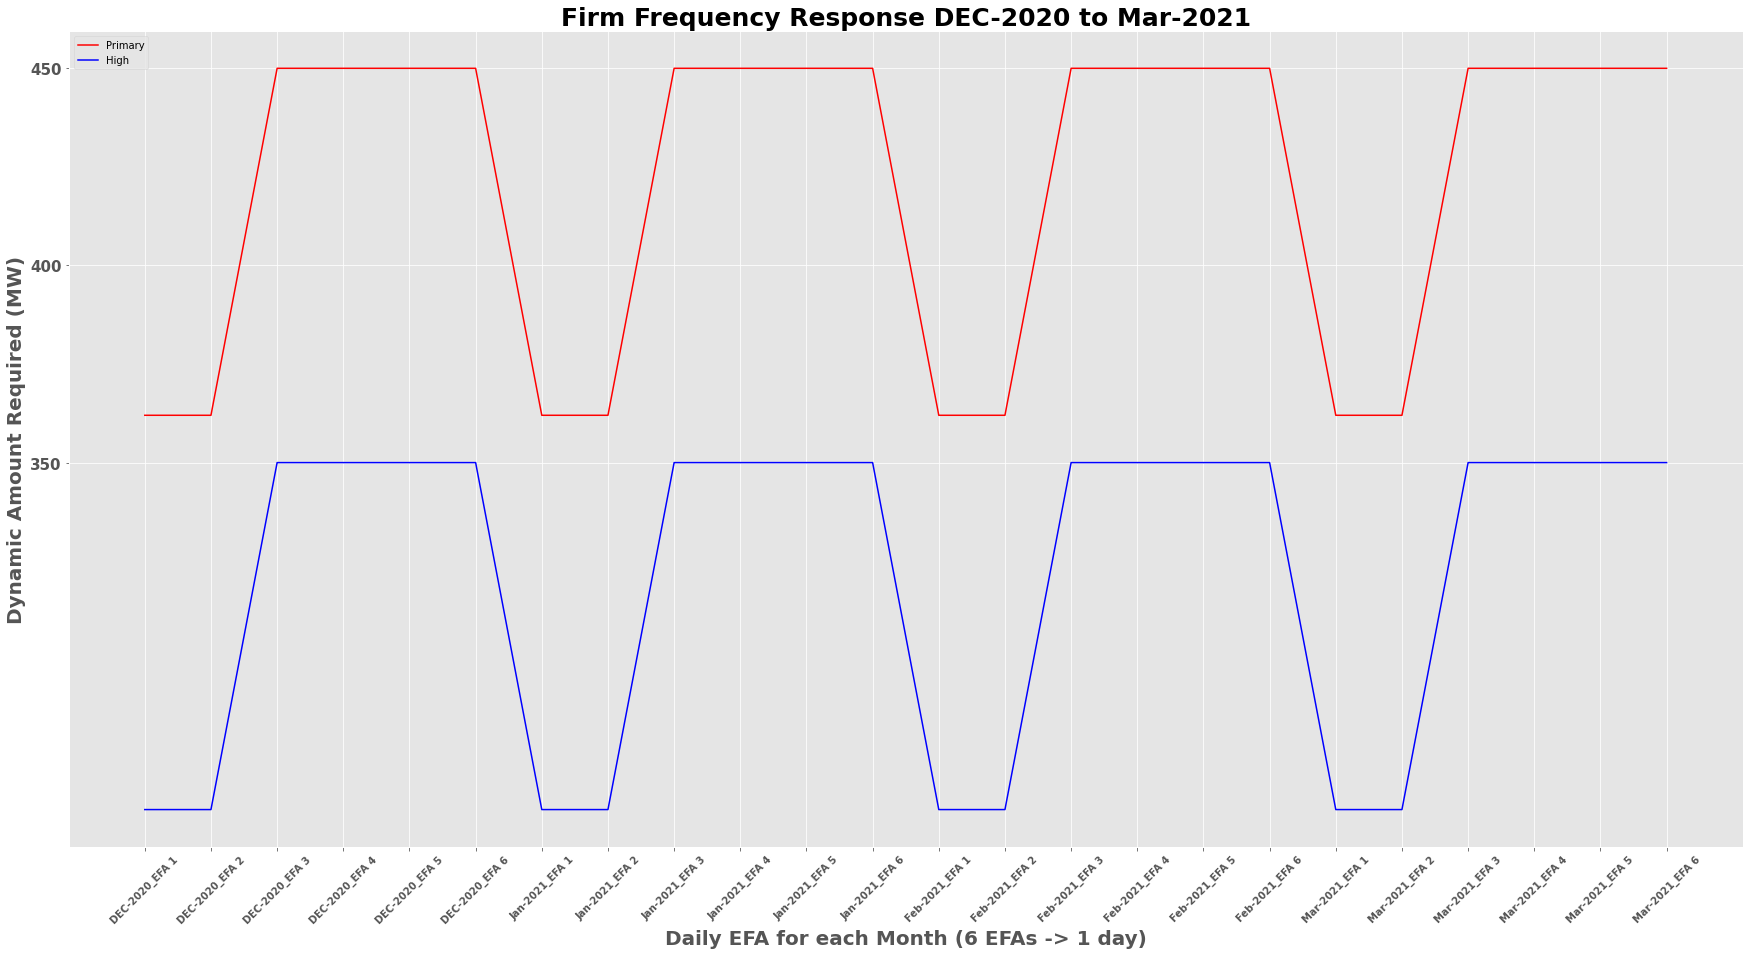

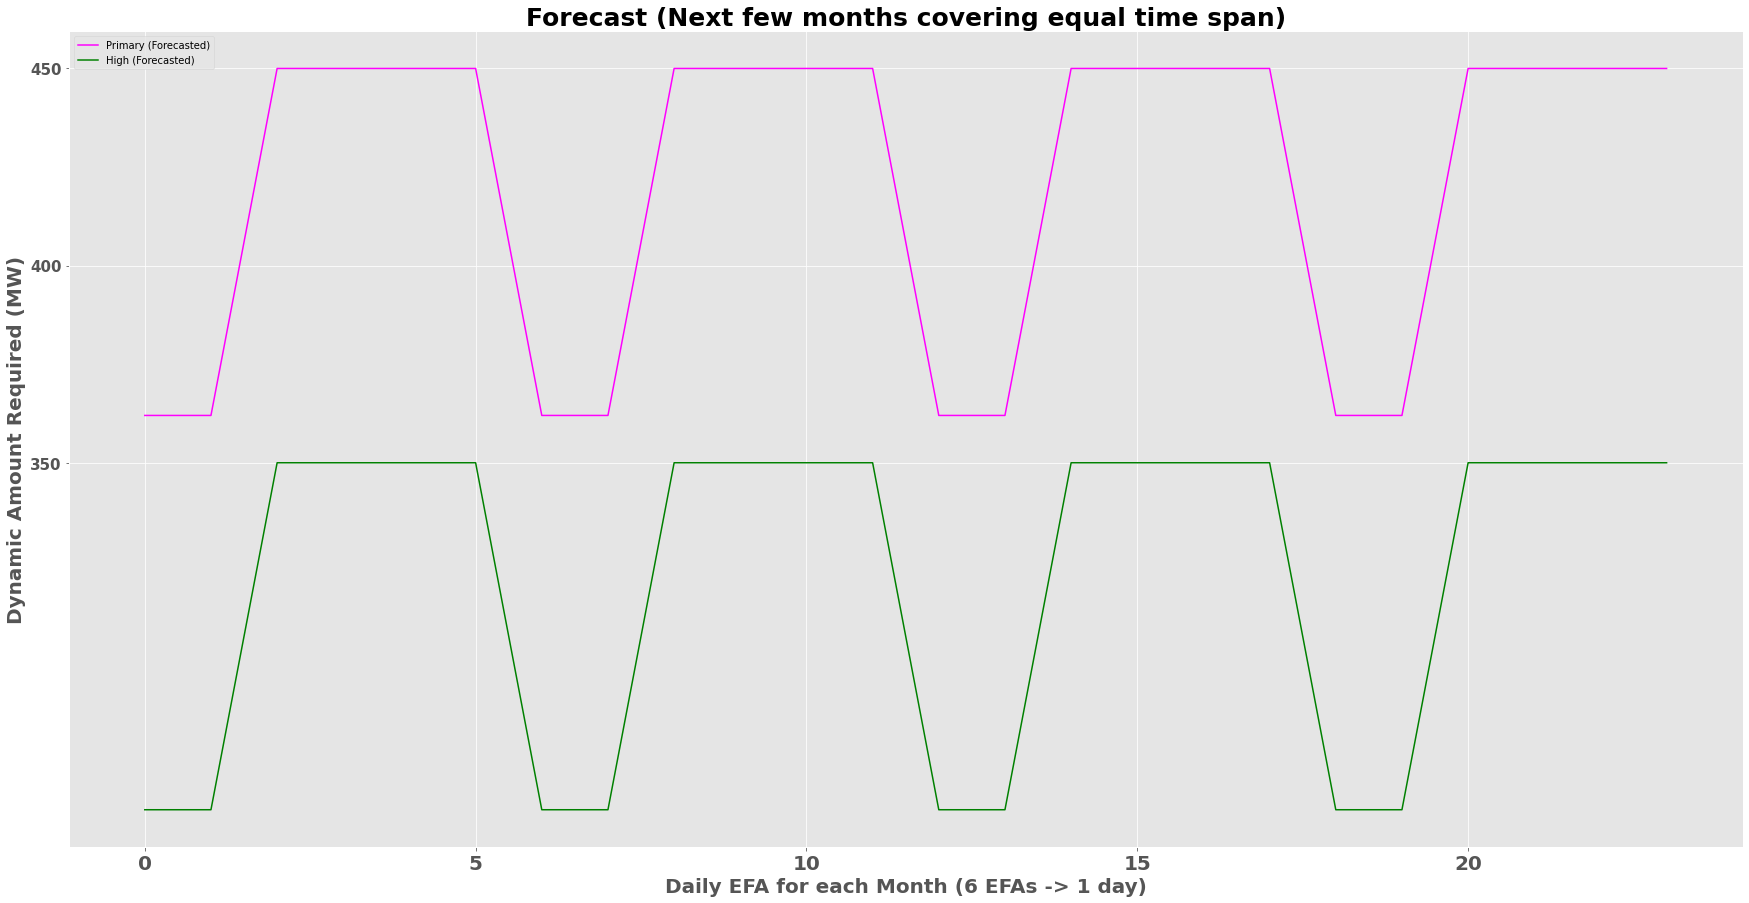

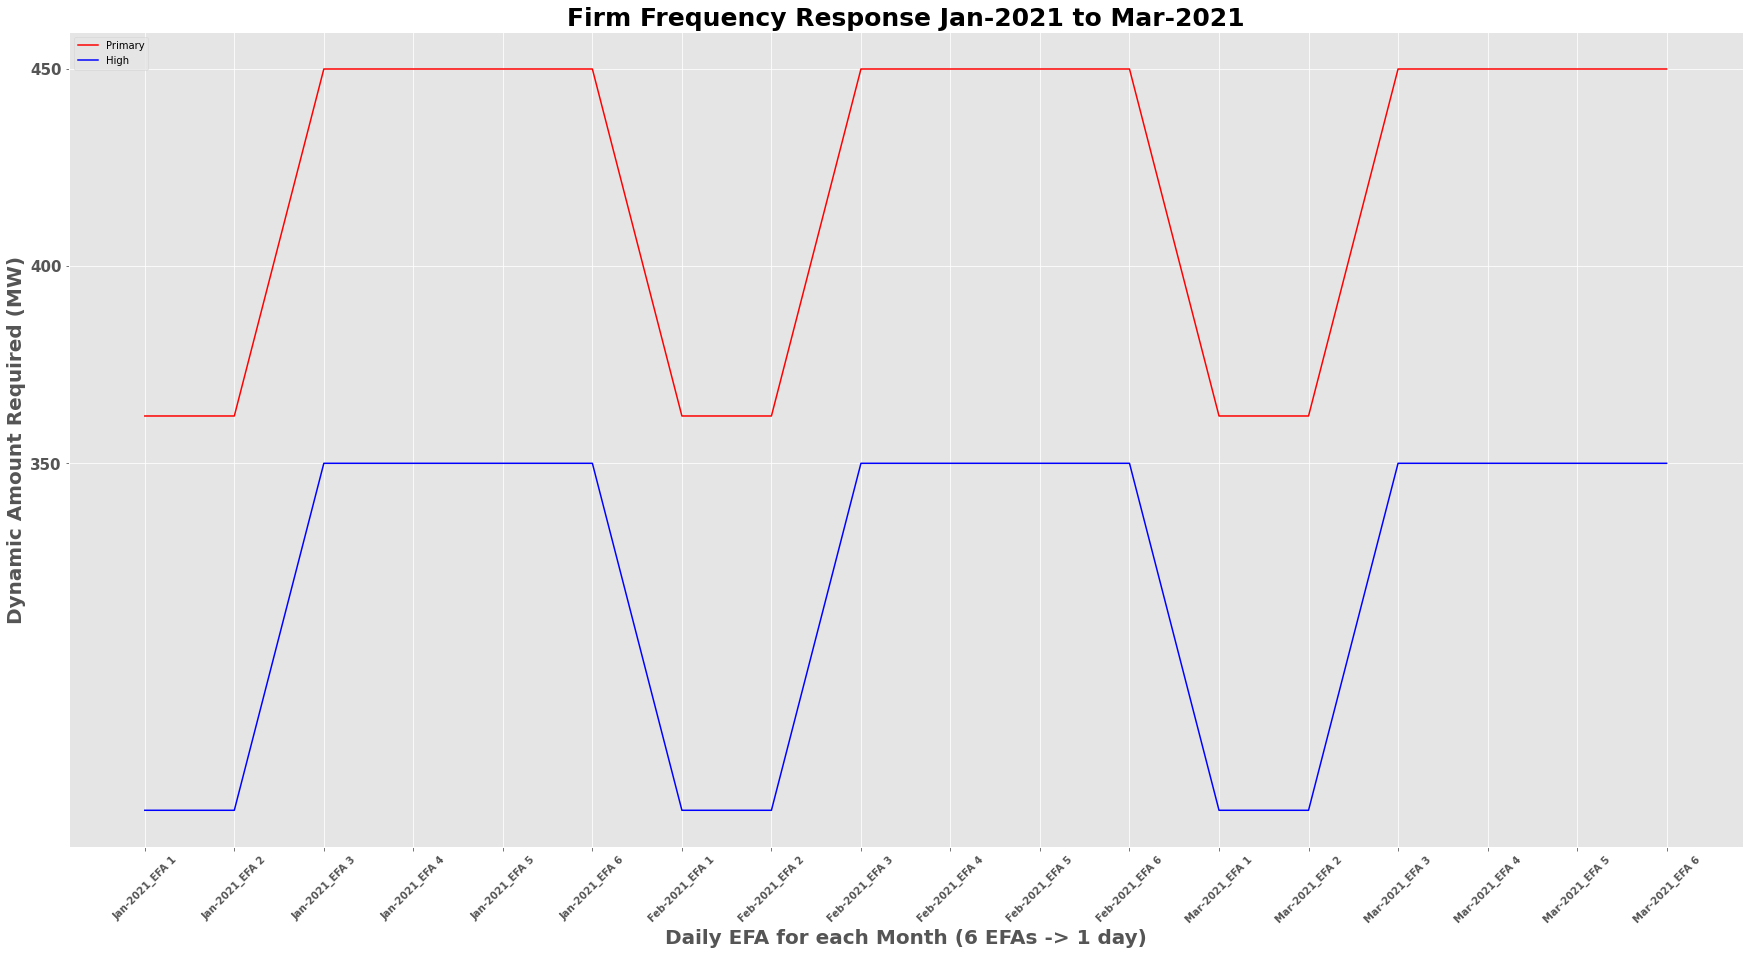

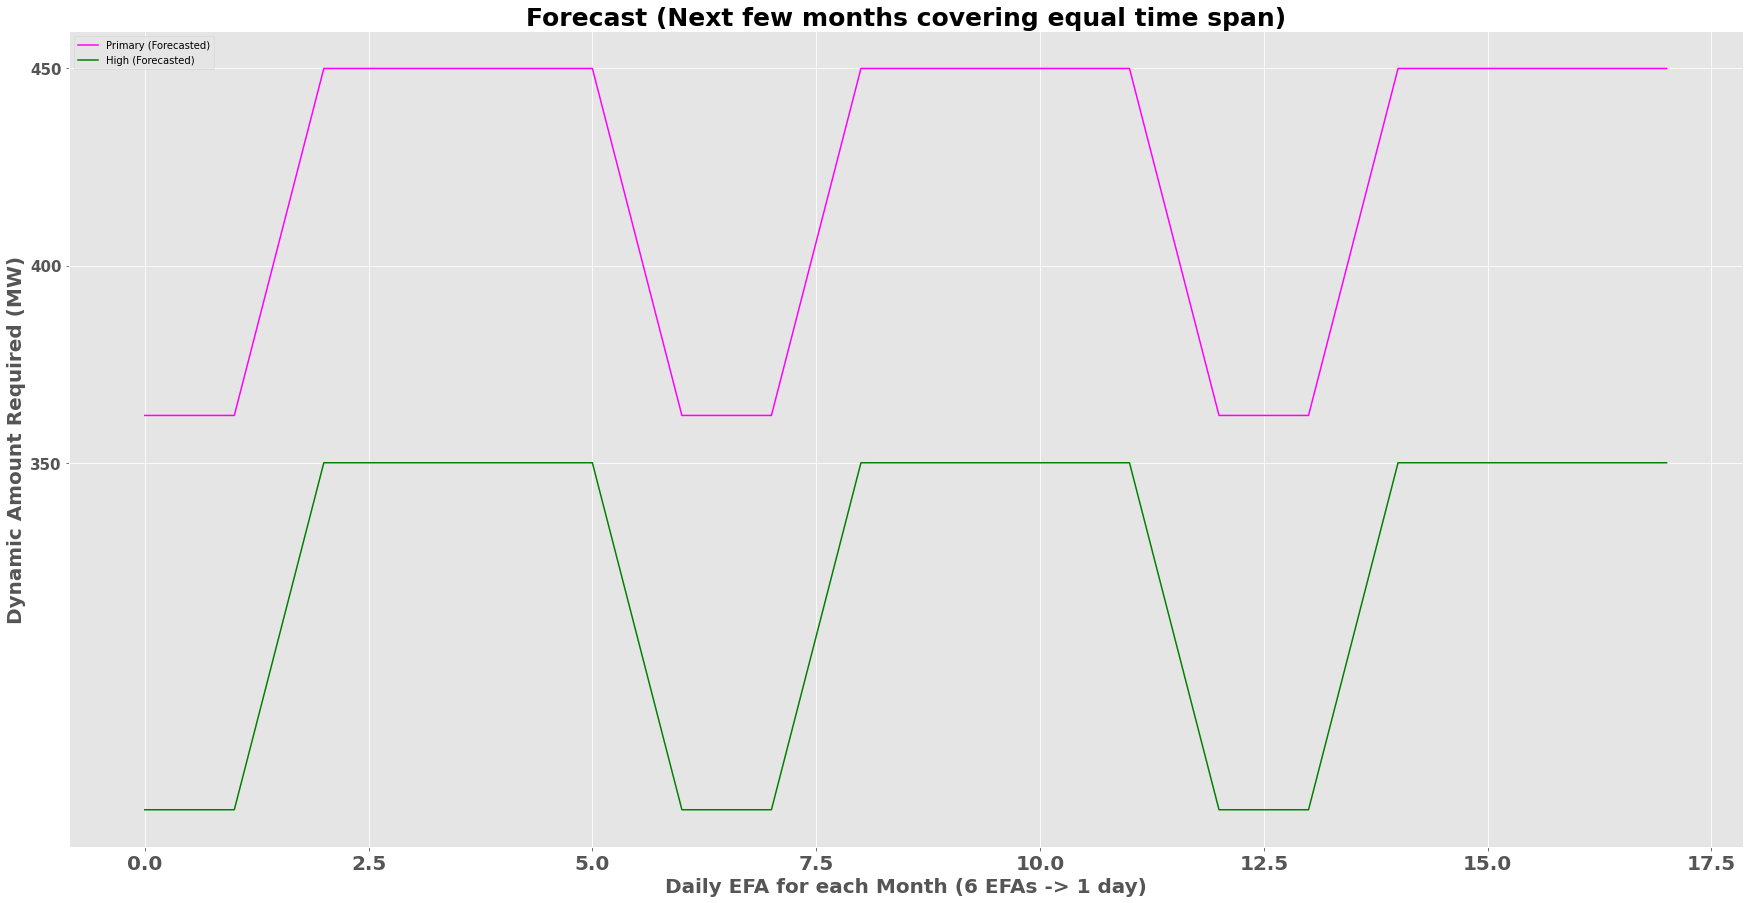

In [12]:
forecasting(files)